# Part I - Prosper Loan Exploration

## by Gorata Malose

## Introduction
> The Prosper Loan dataset contains 113,937 loan listings with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will perform wrangling and produce exploratory    visualisations to investigate variables that affect the Loan Status of each listing i.e., whether a lender is likely to clear their loan or default.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Overview of data shape and composition
pd.set_option('display.max_columns', None)
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
df.shape

(113937, 81)

1. Dataset has 113,937 rows and 81 columns.
2. The dataset is too large, so filter down to relevant variables and create new dataframe called loan

In [5]:
# Filter data relevant variables and create new dataframe
loan = df[['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade','Term', 'ClosedDate', 'LoanStatus', 'BorrowerAPR',
          'BorrowerRate', 'ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)', 
          'BorrowerState', 'Occupation', 'EmploymentStatus','EmploymentStatusDuration','CreditScoreRangeLower',
          'CreditScoreRangeUpper','DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 
          'LoanKey', 'TotalProsperLoans', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'MemberKey', 
           'MonthlyLoanPayment', 'Recommendations','Investors']].copy()

loan.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,Recommendations,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,2009-08-14 00:00:00,Completed,0.16516,0.1580,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,640.0,659.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,19141,9425,2007-09-12 00:00:00,1F3E3376408759268057EDA,330.43,0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,NaN,Current,0.12016,0.0920,6.0,A,7.0,2,CO,Professional,Employed,44.0,680.0,699.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,134815,10000,2014-03-03 00:00:00,1D13370546739025387B2F4,318.93,0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,2009-12-17 00:00:00,Completed,0.28269,0.2750,NaN,NaN,NaN,0,GA,Other,Not available,NaN,480.0,499.0,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,6466,3001,2007-01-17 00:00:00,5F7033715035555618FA612,123.32,0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,NaN,Current,0.12528,0.0974,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,800.0,819.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,77296,10000,2012-11-01 00:00:00,9ADE356069835475068C6D2,321.45,0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,NaN,Current,0.24614,0.2085,3.0,D,4.0,2,MN,Executive,Employed,44.0,680.0,699.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,102670,15000,2013-09-20 00:00:00,36CE356043264555721F06C,563.97,0,20


In [6]:
loan.shape

(113937, 32)

> Data is now smaller, with only 32 columns.

In [7]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,105383.000000,1.139370e+05,22085.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,0.275947,5.608026e+03,1.421100,69444.474271,8337.01385,272.475783,0.048027,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,0.551759,7.478497e+03,0.764042,38930.479610,6245.80058,192.697812,0.332353,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000e+00,0.000000,1.000000,1000.00000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,0.140000,3.200333e+03,1.000000,37332.000000,4000.00000,131.620000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,680.000000,699.000000,0.220000,4.666667e+03,1.000000,68599.000000,6500.00000,217.740000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,720.000000,739.000000,0.320000,6.825000e+03,2.000000,101901.000000,12000.00000,371.580000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,880.000000,899.000000,10.010000,1.750003e+06,8.000000,136486.000000,35000.00000,2251.510000,39.000000,1189.000000


In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingNumber              113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   CreditGrade                28953 non-null   object 
 4   Term                       113937 non-null  int64  
 5   ClosedDate                 55089 non-null   object 
 6   LoanStatus                 113937 non-null  object 
 7   BorrowerAPR                113912 non-null  float64
 8   BorrowerRate               113937 non-null  float64
 9   ProsperRating (numeric)    84853 non-null   float64
 10  ProsperRating (Alpha)      84853 non-null   object 
 11  ProsperScore               84853 non-null   float64
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  BorrowerState              10

In [9]:
# Inspect some of the variables that appear to be categorical variables
loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [10]:
loan.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [11]:
loan.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [12]:
loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

> All the above are categorical variables.

In [13]:
# Some preliminary Cleaning is needed.
# 1. Rename ListingCategory (numeric) column
loan.rename(columns={"ProsperRating (numeric)": "ProsperRatingNumeric",
                          "ProsperRating (Alpha)": "ProsperRatingAlpha",
                          "ListingCategory (numeric)": "ListingCategory"}, inplace = True)
loan.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,Recommendations,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,2009-08-14 00:00:00,Completed,0.16516,0.158,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,640.0,659.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,19141,9425,2007-09-12 00:00:00,1F3E3376408759268057EDA,330.43,0,258


In [14]:
# 2. Convert IncomeRange into ordered categorical type
ordinal_var_dict = {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+']}

ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict['IncomeRange'])

loan['IncomeRange'] = loan['IncomeRange'].astype(ordered_var)

In [15]:
loan.IncomeRange.unique()

['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+', '$75,000-99,999', '$1-24,999', 'Not employed', '$0']
Categories (8, object): ['Not displayed' < 'Not employed' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

In [16]:
# Inspect listing category
loan.ListingCategory.unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

> It is a categorical variable.

### What is the structure of your dataset?

> There are 113, 937 loan listings in the dataset, with 81 features. The dataset is too large, so I created a dataframe with only 32 columns, which include variables of interest, related variables, and identifier variables. Most variables are numeric, but the variable IncomeVerifiable is a boolean categorical variable, and the variables LoanStatus, Occupation, EmploymentStatus, BorrowerState, and Listing Category are nominal categoricals. IncomeRange, ProsperRatingNumeric, ProsperRatingAlpha and ProsperScore are ordinal categorical variables with the following levels:
>
><br> (worst) ——> (best) <br>
IncomeRange: Not displayed, \\$0, Not employed, \\$1-24,999, \\$25,000-49,999, \\$50,000-74,999, \\$75,000-99,999, \\$100,000+
ProsperRatingNumeric: 0 (NA), 1 (HR) to 10 (AA) - after July 2009
ProsperRatingAlpha: HR, E, D, C, B, A, AA - before July 2009
ProsperScore: 1 to 10 (lowest risk) - after July 2009

### What is/are the main feature(s) of interest in your dataset?

>  I'm interested in factors that affect loan status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect BorrowerRate, EmploymentStatus, IncomeRange and DebtToIncomeRatio to be strong determinants of loan status. Though variables like IncomeVerifiable and Recommendations will not have as direct an influence, I expect them to be useful predictors of whether an individual will clear their loan. 

## Univariate Exploration

> In this section, investigate distributions of individual variables.

> Will use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### 1. What is the distribution of the dependent variable of interests (LoanStatus)?

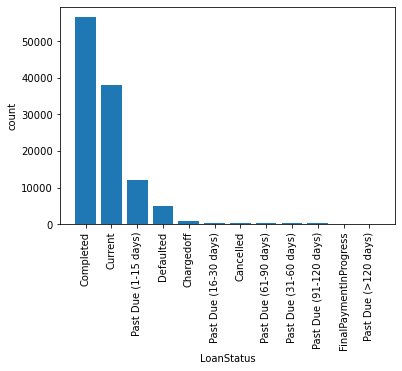

In [17]:
# Return the Series having unique values
x2 = loan['LoanStatus'].unique()
y2 = loan['LoanStatus'].value_counts()

# Create function for plotting bar chart
def LoanStatusDist(x2, y2, **kwargs):
    plt.bar(x2, y2)
    plt.xlabel('LoanStatus')
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()
    
LoanStatusDist(x2, y2)

> Most borrowers have cleared their loans (Completed) or are paying at the appropriate time (Current). And very few have a past due of 120 days. The past due delinquency bin with the highest frequency is 1-15 days. Very few are charged off for frequent delinquency.

In [18]:
#Combine all past due bins, then FinalPaymentInProgress with Current, then charged-off with cancelled

past_due = ['Past Due (1-15 days)','Past Due (16-30 days)', 'Past Due (31-60 days)',
            'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']

for status in loan['LoanStatus']:
    if status in past_due:
        loan['LoanStatus'] = loan['LoanStatus'].replace([status], 'Past Due')
    elif status == 'FinalPaymentInProgress':
        loan['LoanStatus'] = loan['LoanStatus'].replace([status], 'Current')
    elif status == 'Chargedoff':
        loan['LoanStatus'] = loan['LoanStatus'].replace([status], 'Cancelled')

In [19]:
#Confirm that bins have been successfully combined
loan.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Cancelled'],
      dtype=object)

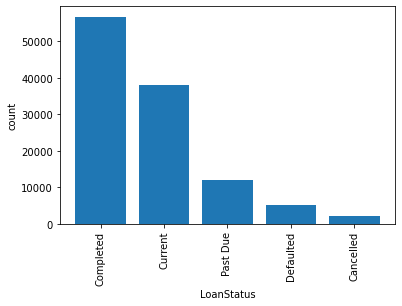

In [22]:
# Replot distribution
x2 = loan['LoanStatus'].unique()
y2 = loan['LoanStatus'].value_counts()

LoanStatusDist(x2, y2)

>New distribution showing that the number of defaulted is actually less than past due and there are very few cancelled loans
in general

#### 2. What are the distributions of the categorical variables of interest (EmploymentStatus and IncomeRange)?

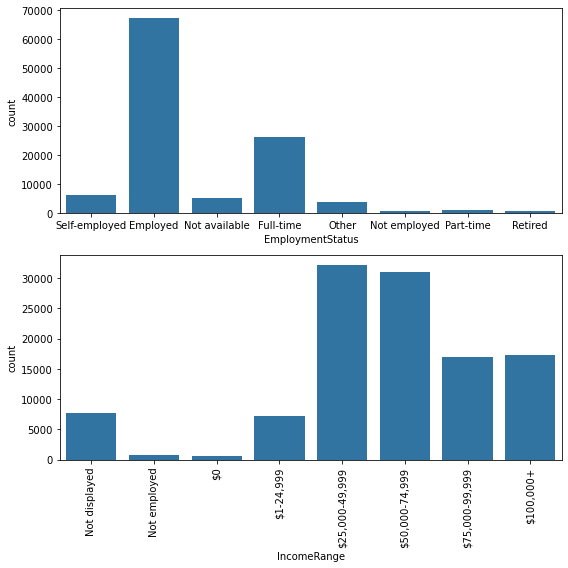

In [23]:
def categoricalVars():
    fig, ax = plt.subplots(nrows=2, figsize = [8,8])
    default_color = sb.color_palette()[0]
    
    sb.countplot(data = loan, x = 'EmploymentStatus', color = default_color, ax = ax[0])
    sb.countplot(data = loan, x = 'IncomeRange', color = default_color, ax = ax[1])
    
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

categoricalVars()

>  Very few borrowers are unemployed or retired. A lot of borrowers are in the mid-income ranges.

In [24]:
#Combine employed, full-time, self-employed and parttime
loan['EmploymentStatus'] = loan['EmploymentStatus'].replace(['Full-time','Self-employed','Part-time'],'Employed')

In [25]:
# Confirm that they are successfully combined
loan.EmploymentStatus.unique()

array(['Employed', 'Not available', 'Other', nan, 'Not employed',
       'Retired'], dtype=object)

In [26]:
#drop null values
loan = loan.loc[~loan.EmploymentStatus.isnull()]

In [27]:
#Combine not displayed and not employed
loan['IncomeRange'] = loan['IncomeRange'].replace(['Not employed'], 'Not displayed')

In [28]:
# Confirm that they are successfully combined
loan.IncomeRange.unique()

['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+', '$75,000-99,999', '$1-24,999', '$0']
Categories (7, object): ['Not displayed' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

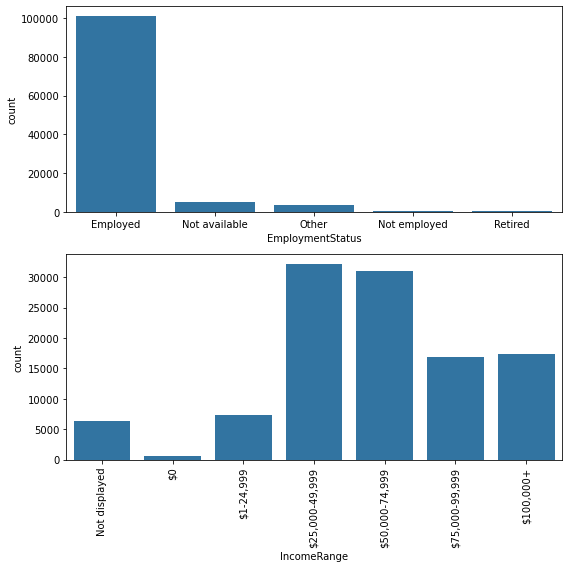

In [29]:
# Replot distributions
categoricalVars()

1. Most borrowers are employed and very few are unemployed or retired.
2. Most borrowers are in the mid-range to upper-range income brackets.

#### 3. What are the occupations of different individuals?

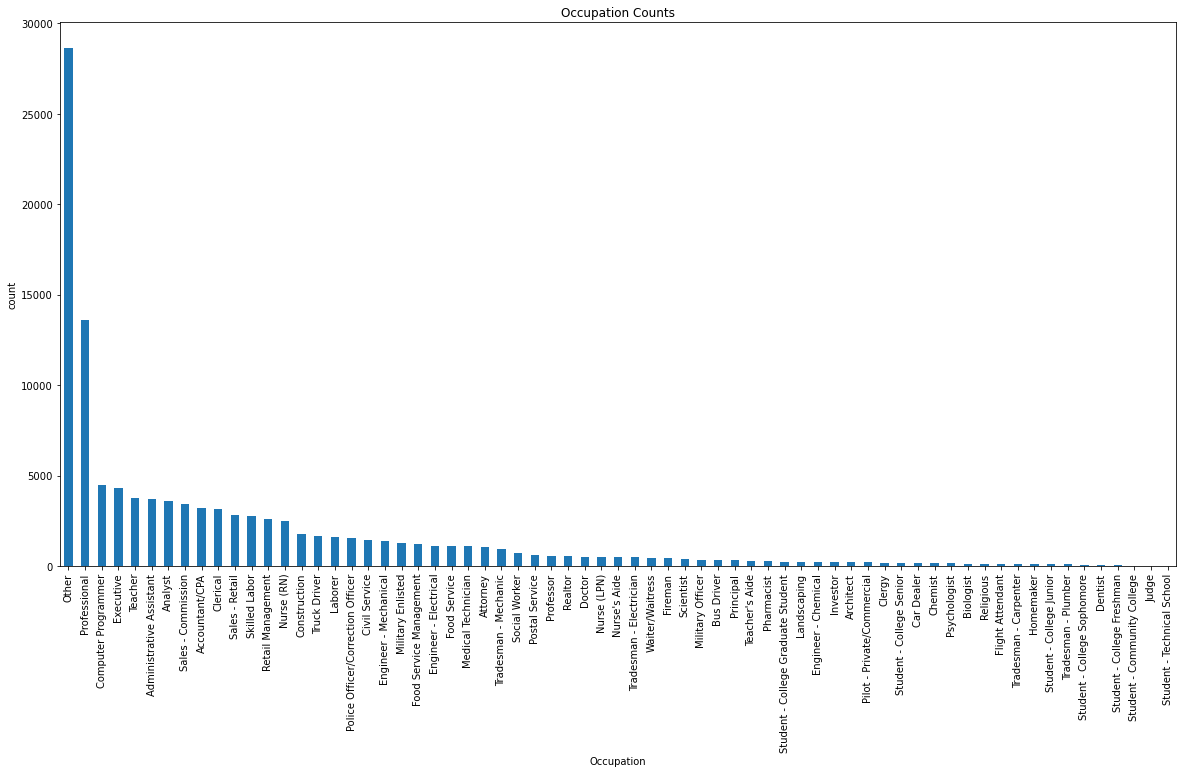

In [30]:
fig, ax = plt.subplots(figsize=(20, 10)) 

loan['Occupation'].value_counts().plot(kind='bar', ax=ax)
plt.title('Occupation Counts')
plt.xlabel('Occupation')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

> A large chunk of borrowers is grouped under Other. Professional is too vague given how detailed the other job titles are.

#### 4. What is the distribution of DebtToIncomeRatio?

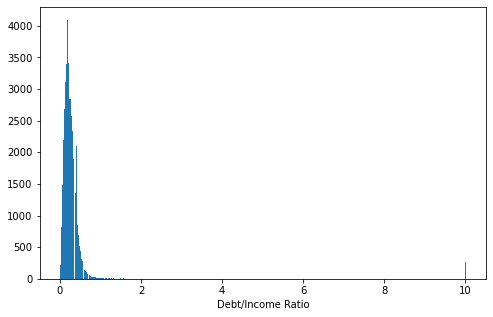

In [31]:
binsize = 0.01

def dtiDist(binsize, **kwargs):
    bins = np.arange(0, loan['DebtToIncomeRatio'].max()+binsize, binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)
    plt.xlabel('Debt/Income Ratio')
    plt.show()
    
dtiDist(binsize)

> Data has extreme outliers. As most values are concentrated between 0 and 1, it is improbable these many borrowers will have a DebtToIncome Ratio of less than 1%, given that values are typically in double-digit percentages less than 50%. Ratio thus appears to be in decimal form and it is supposed to be between 0 and 1
><br>Source: https://www.experian.com/blogs/ask-experian/credit-education/debt-to-income-ratio/#:~:text=5%20or%2050%25.,able%20to%20repay%20a%20loan

In [32]:
# Identify outliers for DebtToIncome ratio
high_outliers = (loan['DebtToIncomeRatio'] > 1)
loan.loc[high_outliers,:]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,Recommendations,Investors
22,101735700321773921526BF,706927,2013-01-30 09:36:13.783000000,NaN,36,NaN,Current,0.35356,0.3134,1.0,HR,2.0,1,NY,Other,Other,68.0,700.0,719.0,9.20,"$1-24,999",True,118.333333,8D313674169912018750992,NaN,84693,4000,2013-02-05 00:00:00,E09A35706330259139A80F8,172.76,0,94
226,2EA63382419173023274969,104542,2007-02-28 10:45:44.153000000,D,36,2009-07-07 00:00:00,Completed,0.11749,0.1000,NaN,NaN,NaN,0,NY,Other,Employed,9.0,600.0,619.0,10.01,Not displayed,False,0.083333,F04F33825997568993DA4EF,NaN,8239,1000,2007-03-07 00:00:00,0E243382750780180A98377,32.27,0,16
368,00F033886616529869C3281,128819,2007-04-25 19:19:24.050000000,C,36,2007-06-19 00:00:00,Completed,0.20735,0.2000,NaN,NaN,NaN,0,IL,Sales - Retail,Employed,7.0,660.0,679.0,1.65,"$1-24,999",True,1083.333333,FF8A338961772502616D061,NaN,14901,16000,2007-05-15 00:00:00,73933386518118965C9E780,594.62,0,74
419,2C71357856570789463BB05,781432,2013-05-16 19:43:43.153000000,NaN,36,2014-02-21 00:00:00,Defaulted,0.35356,0.3134,1.0,HR,3.0,13,GA,Other,Other,28.0,620.0,639.0,1.26,"$1-24,999",True,1061.000000,02CF3683944361774572DE2,1.0,91064,4000,2013-05-22 00:00:00,3B213524758117374717731,172.76,0,50
576,3C18338635952151669AA4C,124494,2007-04-16 17:44:06.780000000,AA,36,2007-06-28 00:00:00,Completed,0.10505,0.0935,NaN,NaN,NaN,0,NC,Homemaker,Retired,65.0,800.0,819.0,10.01,"$1-24,999",False,0.083333,C9C8338661456098557F895,NaN,13269,1500,2007-04-25 00:00:00,574C3374106242551D3C75E,47.94,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113367,F3693583883111490E56B31,827764,2013-07-03 07:07:34.657000000,NaN,36,2013-09-30 00:00:00,Completed,0.35356,0.3134,1.0,HR,4.0,13,OK,Other,Other,20.0,660.0,679.0,2.53,"$1-24,999",True,500.000000,0E533686279073070DA5718,3.0,94973,2000,2013-07-08 00:00:00,169B3383646367256D62FE8,86.38,0,1
113387,DF323501487653892C93A36,485381,2010-11-22 17:23:22.623000000,NaN,36,2013-08-22 00:00:00,Completed,0.39153,0.3500,1.0,HR,2.0,7,MD,Administrative Assistant,Employed,45.0,720.0,739.0,2.38,"$25,000-49,999",True,4000.000000,D5A3360587782196685E877,NaN,45635,1500,2010-12-02 00:00:00,9951348815426519280DEE8,67.85,0,17
113407,F3703411198534084FE3FAC,274103,2008-01-31 10:27:02.483000000,C,36,2011-02-15 00:00:00,Completed,0.25163,0.2365,NaN,NaN,NaN,4,MI,Other,Employed,25.0,640.0,659.0,2.16,"$1-24,999",True,233.333333,F8DB3412466259203599CC1,NaN,27496,1386,2008-02-15 00:00:00,AD173403480233281BF3FE1,54.12,0,23
113486,DA1F3524408616742EDFE28,523860,2011-08-24 09:27:50.863000000,NaN,36,NaN,Current,0.35643,0.3199,1.0,HR,2.0,1,IL,Sales - Retail,Employed,28.0,680.0,699.0,1.05,"$1-24,999",True,441.666667,F6C23627395030824323DBF,NaN,52694,2500,2011-08-30 00:00:00,CBBD35235859956589720BB,108.87,0,1


In [33]:
# Drop the outliers
loan = loan.loc[-high_outliers,:]

In [34]:
# Confirm they have been dropped
loan.query('DebtToIncomeRatio > 1')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,Recommendations,Investors


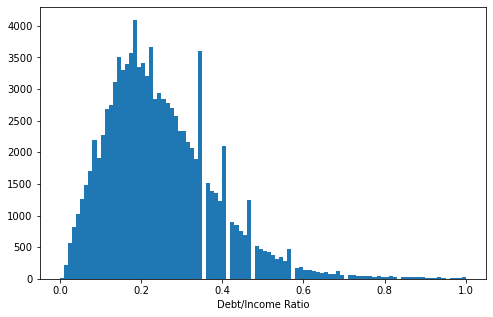

In [35]:
# Replot distribution
dtiDist(0.01)

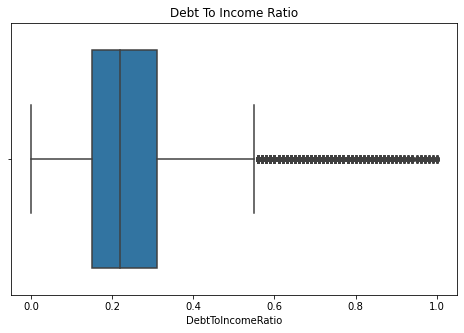

In [36]:
# plot box plot distribution
plt.figure(figsize=(8,5))
sb.boxplot(x='DebtToIncomeRatio',data=loan)
plt.title("Debt To Income Ratio");

> The histogram has gaps, but is skewed to the right, with a general smooth slope, showing that most borrowers have a DtI of around 0.2, which is an accepatable value. The maximum accepatble value for DtI for a loan to be approved is 0.5, so values greater than this amount will appear as outliers on the boxplot. 
><br>Source: https://www.bankrate.com/mortgages/why-debt-to-income-matters-in-mortgages/

#### 5. What is the distribution of BorrowerRate?

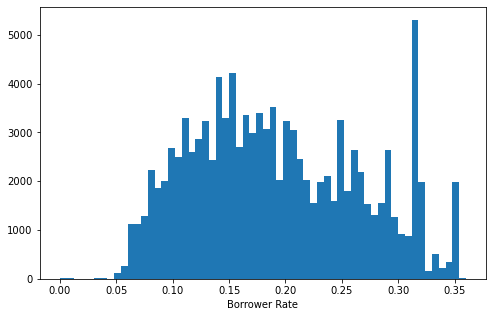

In [37]:
binsize = 0.006

def BorrowerRateDist(binsize, **kwargs):
    bins = np.arange(0, loan['BorrowerRate'].max()+binsize, binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = loan, x = 'BorrowerRate', bins = bins)
    plt.xlabel('Borrower Rate')
    plt.show()
    
BorrowerRateDist(binsize)

> The distribution is generally right skewed, with some peaks to the right, making it multimodal. There is one large peak slightly after 0.3 that is the largest. This outlier could be due to factors such as loan term, location and credit history, which determine interest rates set by lenders.
>
><br>Some values are near 0, which need to be inspected.

In [38]:
# Inspect lower outliers
loan.query('BorrowerRate < 0.04')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,Recommendations,Investors
1484,5D523375277716429C58771,69022,2006-12-01 10:04:58.993000000,E,36,2008-11-21 00:00:00,Completed,0.01657,0.0100,NaN,NaN,NaN,0,IN,Other,Not available,NaN,580.0,599.0,0.20,Not displayed,True,4576.000000,AC4533744391314602B8E3A,NaN,5267,5000,2006-12-07 00:00:00,F7073375370527645AF993D,141.04,0,1
5823,2E07339232691202922692B,156918,2007-06-23 10:32:34.540000000,D,36,2008-12-12 00:00:00,Completed,0.02811,0.0115,NaN,NaN,NaN,0,DE,Other,Employed,0.0,600.0,619.0,0.12,"$25,000-49,999",True,2426.666667,F253339387822146164B7F5,NaN,16432,1000,2007-06-27 00:00:00,B73B3368830614650D13416,28.27,0,1
15993,C25A3406939968877C77DD2,246366,2007-12-07 08:09:25.833000000,D,36,2009-02-13 00:00:00,Cancelled,0.01823,0.0100,NaN,NaN,NaN,1,NY,Retail Management,Employed,32.0,600.0,619.0,0.25,"$1-24,999",True,1833.333333,DBB3340695602718998CBD5,NaN,23574,2000,2007-12-12 00:00:00,CF0B3406747861901E8948E,56.42,1,1
20990,042B336545442159133CE43,27089,2006-07-27 17:09:22.863000000,E,36,2007-10-02 00:00:00,Completed,0.03664,0.0300,NaN,NaN,NaN,0,TX,Other,Not available,NaN,540.0,559.0,0.03,Not displayed,True,5833.333333,220F336559073643659EB2A,NaN,2319,3200,2006-08-04 00:00:00,ED3F33661056355591972D5,93.06,0,1
20993,043D3389270464618FF9BA8,133611,2007-05-06 20:47:08.770000000,C,36,2010-05-18 00:00:00,Completed,0.03664,0.0300,NaN,NaN,NaN,0,TX,Sales - Retail,Employed,56.0,640.0,659.0,0.23,"$25,000-49,999",True,3750.000000,1A2733900710591478446BE,NaN,15127,3000,2007-05-18 00:00:00,E976338891248608168ED72,87.24,0,1
26650,2E09337145157954182A2D0,49987,2006-10-18 11:51:32.590000000,HR,36,2007-08-22 00:00:00,Defaulted,0.01647,0.0099,NaN,NaN,NaN,0,TX,Clerical,Not available,NaN,520.0,539.0,0.18,Not displayed,True,2500.000000,35E03372062071211FE522C,NaN,4101,4500,2006-10-23 00:00:00,53C23370552058111F2246D,126.92,0,1
32320,D59A3426208311032296356,365762,2008-07-11 13:23:33.183000000,HR,36,2011-07-18 00:00:00,Completed,0.05022,0.0300,NaN,NaN,NaN,5,WY,Waiter/Waitress,Employed,33.0,540.0,559.0,NaN,"$1-24,999",False,1000.000000,F81D3427097497115D0F982,NaN,34323,1400,2008-07-18 00:00:00,B3E53426607529362479296,40.71,0,1
33287,6F723403076471690BBA7CE,223827,2007-10-31 10:31:36.283000000,C,36,2010-09-24 00:00:00,Completed,0.01657,0.0100,NaN,NaN,NaN,0,NC,Clerical,Employed,50.0,660.0,679.0,0.27,"$25,000-49,999",True,2500.000000,F5F6340358387430505FC7F,NaN,21448,4000,2007-11-07 00:00:00,4C663402790544726848F3F,112.83,0,1
37201,303A34319537963605965C9,394526,2008-09-07 20:55:32.837000000,E,36,2011-09-25 00:00:00,Completed,0.02998,0.0100,NaN,NaN,NaN,5,CA,Administrative Assistant,Employed,0.0,580.0,599.0,NaN,"$1-24,999",False,500.000000,1A2A3432997181348CEC81C,NaN,37072,1500,2008-09-25 00:00:00,60983430687073792123794,26.91,1,16
38187,7D5D3393593671475950A37,168141,2007-07-12 11:32:43.287000000,B,36,2010-07-27 00:00:00,Completed,0.01657,0.0100,NaN,NaN,NaN,0,CA,Other,Not employed,125.0,680.0,699.0,NaN,$0,False,0.000000,AE0833962315127749FE704,NaN,17344,5000,2007-07-27 00:00:00,22583394733007161F96561,95.06,0,1


> Low interest rates are expected for listings with low risk, higher credit score and lower debt-to-income ratio.
<br>Source: https://www.georgiasown.org/three-factors-determine-interest-rate-will/
>
><br> Some listings are suspicious because they are high risk (D to HR) credit grade and they have low credit score ranges. A good credit score that can get you a low interest rate is in the range of 670 to 739.
<br>Source: https://www.bankrate.com/loans/personal-loans/average-credit-score-for-personal-loans/#:~:text=To%20qualify%20for%20a%20personal,score%20of%20690%20and%20above.
>
><br> Prosper also has a minimum recommended score of 640.
><br> Source: https://www.investopedia.com/prosper-personal-loans-review-4843741#:~:text=Its%20platform%20matches%20borrowers%20seeking,score%20that's%20at%20least%20640.
>
><br> Listings with higher credit scores, where lower bound is at least 660, are generally low risk, with a credit grade of at 
most C, making them safe.

In [39]:
# Identify listings with BorrowerRate < 0.04 and CreditScoreRangeLower < 660
low_credit_score = ((loan['BorrowerRate'] < 0.04) & (loan['CreditScoreRangeLower'] <660))
loan.loc[low_credit_score,:]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,Recommendations,Investors
1484,5D523375277716429C58771,69022,2006-12-01 10:04:58.993000000,E,36,2008-11-21 00:00:00,Completed,0.01657,0.0100,NaN,NaN,NaN,0,IN,Other,Not available,NaN,580.0,599.0,0.20,Not displayed,True,4576.000000,AC4533744391314602B8E3A,NaN,5267,5000,2006-12-07 00:00:00,F7073375370527645AF993D,141.04,0,1
5823,2E07339232691202922692B,156918,2007-06-23 10:32:34.540000000,D,36,2008-12-12 00:00:00,Completed,0.02811,0.0115,NaN,NaN,NaN,0,DE,Other,Employed,0.0,600.0,619.0,0.12,"$25,000-49,999",True,2426.666667,F253339387822146164B7F5,NaN,16432,1000,2007-06-27 00:00:00,B73B3368830614650D13416,28.27,0,1
15993,C25A3406939968877C77DD2,246366,2007-12-07 08:09:25.833000000,D,36,2009-02-13 00:00:00,Cancelled,0.01823,0.0100,NaN,NaN,NaN,1,NY,Retail Management,Employed,32.0,600.0,619.0,0.25,"$1-24,999",True,1833.333333,DBB3340695602718998CBD5,NaN,23574,2000,2007-12-12 00:00:00,CF0B3406747861901E8948E,56.42,1,1
20990,042B336545442159133CE43,27089,2006-07-27 17:09:22.863000000,E,36,2007-10-02 00:00:00,Completed,0.03664,0.0300,NaN,NaN,NaN,0,TX,Other,Not available,NaN,540.0,559.0,0.03,Not displayed,True,5833.333333,220F336559073643659EB2A,NaN,2319,3200,2006-08-04 00:00:00,ED3F33661056355591972D5,93.06,0,1
20993,043D3389270464618FF9BA8,133611,2007-05-06 20:47:08.770000000,C,36,2010-05-18 00:00:00,Completed,0.03664,0.0300,NaN,NaN,NaN,0,TX,Sales - Retail,Employed,56.0,640.0,659.0,0.23,"$25,000-49,999",True,3750.000000,1A2733900710591478446BE,NaN,15127,3000,2007-05-18 00:00:00,E976338891248608168ED72,87.24,0,1
26650,2E09337145157954182A2D0,49987,2006-10-18 11:51:32.590000000,HR,36,2007-08-22 00:00:00,Defaulted,0.01647,0.0099,NaN,NaN,NaN,0,TX,Clerical,Not available,NaN,520.0,539.0,0.18,Not displayed,True,2500.000000,35E03372062071211FE522C,NaN,4101,4500,2006-10-23 00:00:00,53C23370552058111F2246D,126.92,0,1
32320,D59A3426208311032296356,365762,2008-07-11 13:23:33.183000000,HR,36,2011-07-18 00:00:00,Completed,0.05022,0.0300,NaN,NaN,NaN,5,WY,Waiter/Waitress,Employed,33.0,540.0,559.0,NaN,"$1-24,999",False,1000.000000,F81D3427097497115D0F982,NaN,34323,1400,2008-07-18 00:00:00,B3E53426607529362479296,40.71,0,1
37201,303A34319537963605965C9,394526,2008-09-07 20:55:32.837000000,E,36,2011-09-25 00:00:00,Completed,0.02998,0.0100,NaN,NaN,NaN,5,CA,Administrative Assistant,Employed,0.0,580.0,599.0,NaN,"$1-24,999",False,500.000000,1A2A3432997181348CEC81C,NaN,37072,1500,2008-09-25 00:00:00,60983430687073792123794,26.91,1,16
44393,6B88337003023311719C524,47260,2006-10-11 15:59:42.477000000,HR,36,2008-05-12 00:00:00,Completed,0.02159,0.0150,NaN,NaN,NaN,0,KS,Sales - Retail,Not available,NaN,500.0,519.0,0.18,Not displayed,True,2643.333333,F7603372115376592BD515A,NaN,4029,5000,2006-10-20 00:00:00,8A4B33691602899279566FC,142.12,0,1
45878,36D23386050248407008F40,122293,2007-04-11 16:36:57.897000000,D,36,2010-04-20 00:00:00,Completed,0.03664,0.0300,NaN,NaN,NaN,0,MN,Other,Employed,1.0,620.0,639.0,0.23,"$25,000-49,999",True,2416.666667,42D13388058618586BB1EAE,NaN,13112,2850,2007-04-20 00:00:00,68FD33688455956417B3EF9,82.88,0,1


> The table above shows that lower credit score ranges are consistent with higher risk (D to HR)

In [40]:
# Drop listings with BorrowerRate < 0.04 and CreditScoreRangeLower < 660
loan = loan.loc[-low_credit_score,:]

In [41]:
loan.query('BorrowerRate < 0.04')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MemberKey,MonthlyLoanPayment,Recommendations,Investors
33287,6F723403076471690BBA7CE,223827,2007-10-31 10:31:36.283000000,C,36,2010-09-24 00:00:00,Completed,0.01657,0.0100,NaN,NaN,NaN,0,NC,Clerical,Employed,50.0,660.0,679.0,0.27,"$25,000-49,999",True,2500.000000,F5F6340358387430505FC7F,NaN,21448,4000,2007-11-07 00:00:00,4C663402790544726848F3F,112.83,0,1
38187,7D5D3393593671475950A37,168141,2007-07-12 11:32:43.287000000,B,36,2010-07-27 00:00:00,Completed,0.01657,0.0100,NaN,NaN,NaN,0,CA,Other,Not employed,125.0,680.0,699.0,NaN,$0,False,0.000000,AE0833962315127749FE704,NaN,17344,5000,2007-07-27 00:00:00,22583394733007161F96561,95.06,0,1
53423,437334016695421433C8823,216769,2007-10-16 12:22:08.443000000,B,36,2008-12-04 00:00:00,Completed,0.01548,0.0005,NaN,NaN,NaN,0,CO,Realtor,Employed,0.0,680.0,699.0,0.30,"$25,000-49,999",True,2166.666667,B48B3402776536912AB5531,NaN,21130,1100,2007-10-25 00:00:00,055A340146424170142BF6B,30.58,0,1
61594,6BD234031800705489AFD61,220187,2007-10-23 11:35:46.613000000,A,36,2010-07-08 00:00:00,Completed,0.04166,0.0350,NaN,NaN,NaN,0,IL,Student - College Graduate Student,Employed,62.0,720.0,739.0,NaN,$0,False,0.000000,756534049548555810A4F3E,NaN,21353,2900,2007-11-05 00:00:00,0DC73396435652655192897,84.98,0,1
62589,B23B3383596767703E1B8CB,109352,2007-03-10 14:12:09.257000000,AA,36,2010-03-19 00:00:00,Completed,0.05133,0.0345,NaN,NaN,NaN,0,NaN,Engineer - Electrical,Employed,266.0,840.0,859.0,0.01,"$75,000-99,999",True,7500.000000,D2F23383558761363A1E58D,NaN,8634,1000,2007-03-19 00:00:00,F5F133662639147302CE10E,29.28,0,2
76858,7ADE3385294777364BFEDD6,115163,2007-03-24 10:03:30.717000000,C,36,2010-03-27 00:00:00,Completed,0.00653,0.0000,NaN,NaN,NaN,0,MI,Food Service Management,Employed,152.0,660.0,679.0,0.06,"$1-24,999",True,1833.333333,27B533839209731593947BA,NaN,9000,3000,2007-03-27 00:00:00,F0AC3377846854835F2B667,83.33,0,2
78920,CBC03418552010666B09260,319969,2008-04-28 11:48:10.400000000,C,36,2009-09-15 00:00:00,Completed,0.01987,0.0000,NaN,NaN,NaN,1,NJ,Dentist,Employed,3.0,660.0,679.0,0.43,"$75,000-99,999",True,7916.666667,DC383419893640145C50801,NaN,30274,25000,2008-04-29 00:00:00,33CB3364497014118C1E9ED,609.84,0,2
80951,4C2F34314285450133EA106,399613,2008-09-16 22:11:05.207000000,B,36,2009-10-03 00:00:00,Cancelled,0.05296,0.0395,NaN,NaN,NaN,1,CA,Other,Employed,79.0,700.0,719.0,NaN,"$50,000-74,999",False,5000.000000,4A933433060891499CA83EA,NaN,37334,15000,2008-10-02 00:00:00,3DA934321161701231D814A,442.53,0,1
112717,C52F3426964405073574757,369381,2008-07-17 22:44:53,A,36,2010-10-13 00:00:00,Completed,0.01315,0.0000,NaN,NaN,NaN,7,CA,Analyst,Employed,158.0,720.0,739.0,0.02,"$100,000+",True,9166.666667,62D5342790610881324283E,NaN,34704,3000,2008-07-29 00:00:00,D41C342721839207608D3D1,83.33,0,1


> We are now left with listings with lower risk, at most CreditGrade of C

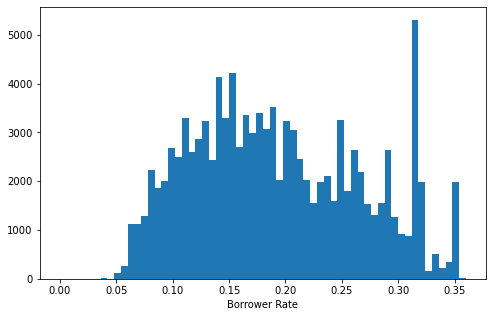

In [42]:
# Replot Distribution
BorrowerRateDist(binsize)

> The distribution still has low interest rates, which are legitimate, given factors like lower risk and higher credit score.

#### 6. What is the % composition of individuals with verifiable income?

Text(0.5, 1.0, 'Income is Verifiable')

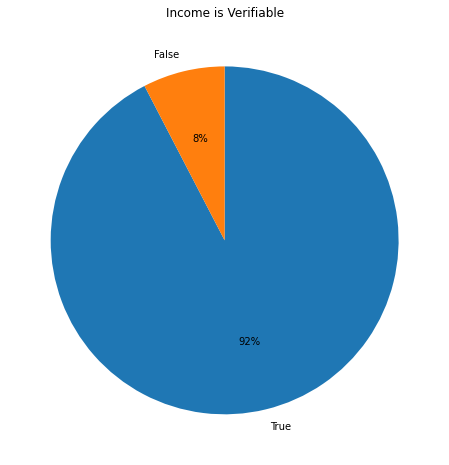

In [43]:
plt.figure(figsize=(10,8))
verifiable = loan['IncomeVerifiable'].value_counts()

plt.pie(verifiable, labels = verifiable.index, startangle = 90, autopct='%1.0f%%', counterclock = False)
plt.title('Income is Verifiable')

> 92% of listings have a verifiable income source.

#### 7. What is the distribution of Recommendations?

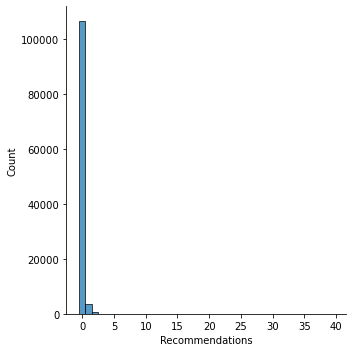

In [44]:
sb.displot(loan, x="Recommendations", discrete=True)

> Most borrowers have o recommendations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. Completed loans and Current loans consitute the largest shares of LoanStatus. 
2. Most borrower are employed and are in the mid-range to upper-range income brackets. 
3. 92% of borrowers also have a verified source of income. 
4. I combined redundant bins for LoanStatus, EmploymentStatus and IncomeRange. 
5. Most people also have 0 to 1 recommendations. 
6. Other and professional consitute the largest share of occupations but they are vague, given how detailed the other occupations are. Occupation will thus not be useful for analysis, and also because it has too many categories.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. I changed IncomeRange into an ordered categorical type.
2. I changed the column name of Listing Category (numeric) to one without a column space i.e. ListingCategory
3. I also replaced the numeric values in ListingCategory with the actual descriptive categories.
4. DebtToIncomeRatio is supposed to be between 0.1 and 1.0, with 0.5 being the highest acceptable by lenders. I dropped extreme outliers with values beyond 1, as they also made the distribution extremely right skewed. After dropping outliers, the distribution was skewed to the right, with a general smooth slope and some unusual gaps. DtI is concentrated around 0.2, which is an accepatable ratio because the lower the DtI the better. DtI's higher than 0.5 are considered unsafe by lenders and they appear as outliers in the boxplot distribution.
5. The BorrowerRate is generally right skewed and multimodal. Some of the listings had suspiciously low BorrowerRates given thhat they were high risk and in the lower ranges of credit scores. I dropped these outliers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### 1. What are the pairwise correlations of the quantitative variables of interest?

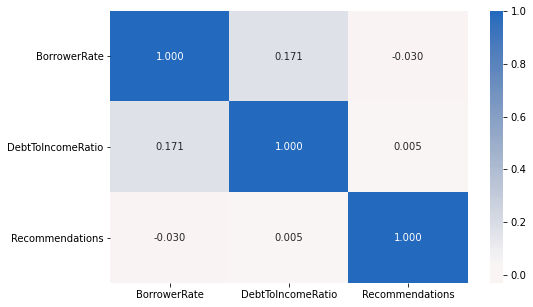

In [45]:
# pairwise correlations using heatmaps
numeric_vars = ['BorrowerRate', 'DebtToIncomeRatio', 'Recommendations']
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

1. As expected, recommendations are negatively correlated with BorrowerRate because more recommendations boost creditworthiness
 and increase likelihood of getting lower interest rates.
2. DtI has a positive correlation with BorrowerRate because a high DtI lowers creditworthiness and leads to higher borrower rates due to lenders seeing the listing as risky.
3. DtI and Recommendations have a weak positive correlation. The variables are not directly related but this positive relationship could be due to the fact that more recommendations increase likelihood of getting higher loan amounts, which increase the ratio, if the income constant.

loan.shape= (110873, 32)
loan_samp.shape= (200, 32)


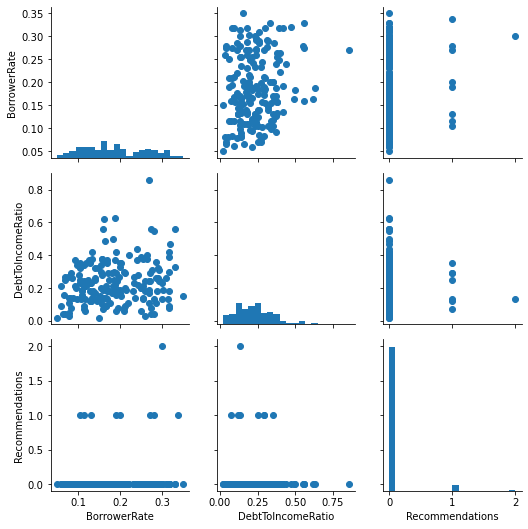

In [46]:
# plot matrix: sample 200 listings
print("loan.shape=",loan.shape)
loan_samp = loan.sample(n=200, replace = False)
print("loan_samp.shape=",loan_samp.shape)

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

This chart once again shows the weak positive correlation between BorrowerRate and DebtToIncomeRatio. The correlations between BorrowerRate & Recommendations and DtI & Recommendations do not appear on the chart, which makes sense because the correlation coefficients are very low.

#### 2. What is the relationship between LoanStatus and numeric variables?

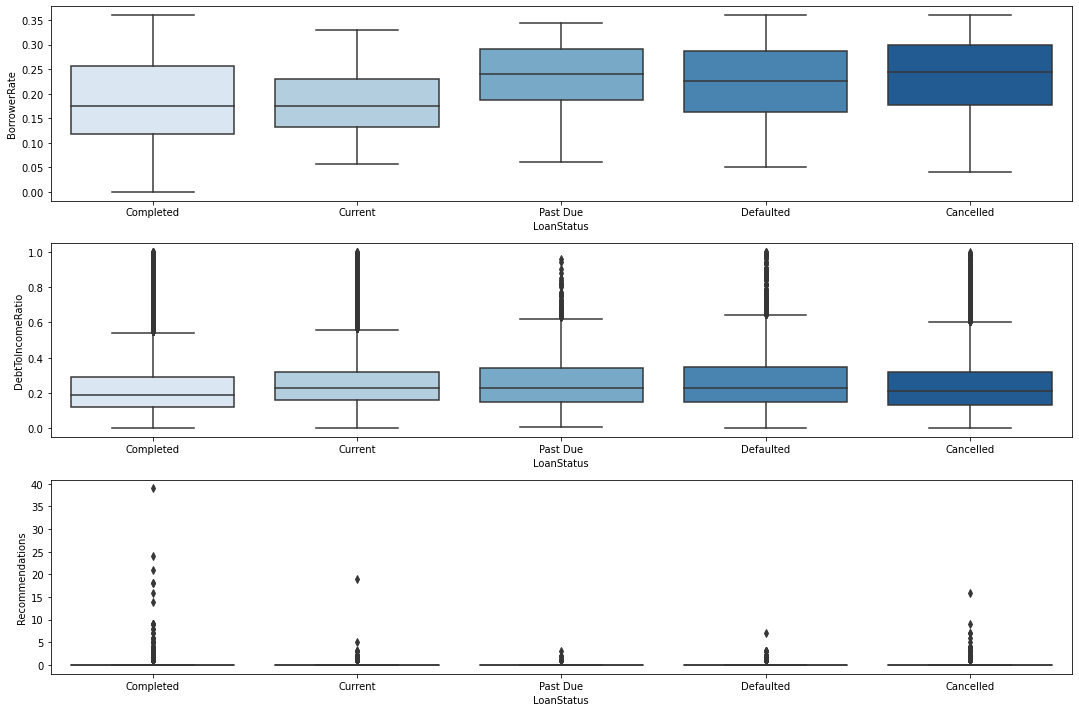

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15,10), sharex=True)

plt.subplot(3, 1, 1)
sb.boxplot(data=loan, x='LoanStatus', y='BorrowerRate', palette='Blues')

plt.subplot(3, 1, 2)
sb.boxplot(data=loan, x='LoanStatus', y='DebtToIncomeRatio', palette='Blues')

plt.subplot(3, 1, 3)
sb.boxplot(data=loan, x='LoanStatus', y='Recommendations', palette='Blues')

plt.tight_layout()

1. Completed Loan listings have a generally lower median BorrowerRate, indicating that lower interest rates increase likelhood of loan clearance. PastDue has the one of the highest median BRs, showing that higher rates increase likelihood of defaulting. Completed also has the widest range of BorrowerRates, including very low interest rates, which is consistent with the data that lower rates increase likelihood of loan clearance.
2. DtI distributions have similar shapes and levels as most values are concentrated around 0.2, but Completed has a slightly
lower DtI than the rest. As lower DtI's are preferred, this indicate that listings with lower DtI's are more likely to
have a Completed Loan status
3. The Recommendation distributions for LoanStatus are all thin slices at similar levels as the values are concentrated around
0 to 1. However, it's interesting to note that high outliers, including max values, are concentrated at Completed, showing
that listings with more recommendations are more likely to have the loans cleared.

#### 3. What is the relationship between LoanStatus and IncomeRange and EmploymentStatus?

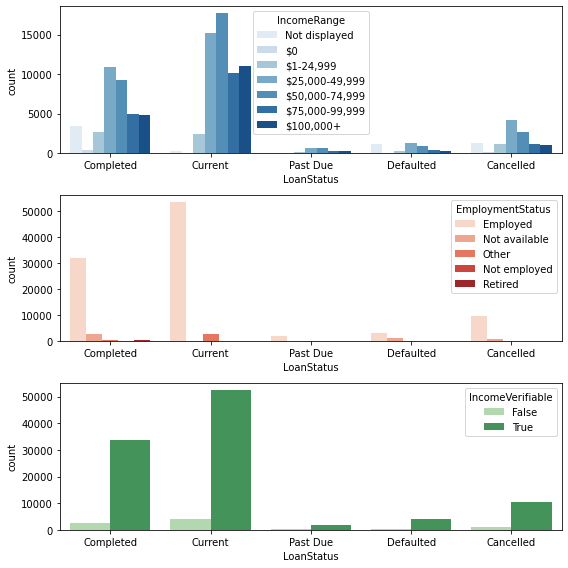

In [48]:
plt.figure(figsize = [8, 8])

# subplot 1: Loan Status vs Income Range
plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')

# subplot 2: Loan Status vs Employment Status
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Reds')

# subplot 3: Loan Status vs IncomeVerifiable
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'LoanStatus', hue = 'IncomeVerifiable', palette = 'Greens')

plt.tight_layout()
plt.show()

1. Most borowers with Completed or Current loan status have an income of at least \\$25,000 and they are centered around
Current loan status. The largest peaks per category are generally \\$25,000-49,999 and \\$50,000-74,999. For PastDue, Defaulted and Cancelled loans, there are significantly fewer counts, showing that income range is a direct contributor to loan status clearance.
2. Employed is the most prominent peak per loan status category, but the tallest peaks are at Completed and Current, showing 
borrowers who are employed are more likely to clear their loans.
3. Borrowers with a Completed or Current loan status typically have a verifiable income source and the counts are significantly less for people with PastDue, Defaulted or Cancelled loan statuses.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Employed borrowers, higher income borrowers and borrowers with verifiable income sources were prominent for all LoanStatus categories, but the counts were significantly small for negative loan statuses like PastDue and Defaulted.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> DebtToIncomeRatio had a positive correlation with Recommendations, though you'd expect borrowers with high DtI to have fewer recommendations. However, the correlation was small and the scatter plot doesn't show a visible relationship. It could be that Recommendations are increasing Loan amount lended, which might in turn be increasing the ratio.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### 1. What is the relationship between LoanStatus, DtI and BorrowerRate?

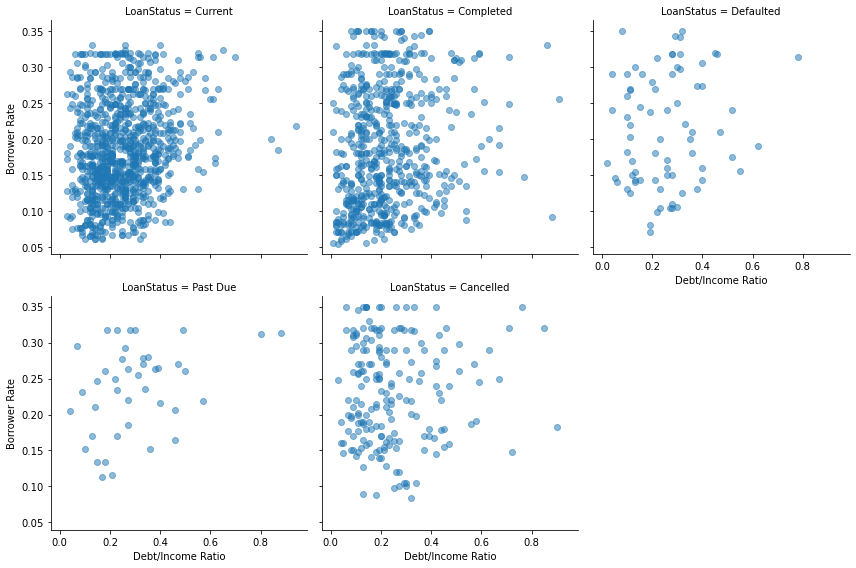

In [49]:
# Relationship between LoanStatus, DtI and BorrowerRate
loan_samp = loan.sample(n=2000, replace = False)
g = sb.FacetGrid(data = loan_samp, col = 'LoanStatus', 
                  height=4, margin_titles=True, col_wrap = 3) # height sets the chart size
g.map(plt.scatter, 'DebtToIncomeRatio', 'BorrowerRate', alpha = 1/2)
g.set_xlabels('Debt/Income Ratio')
g.set_ylabels('Borrower Rate')

>There is a positive relationship between DtI and BorrowerRate, because higher DtI increases loan risk and thus raises 
interest rates, making it easier for borrower to default. Current and Completed LoanStatus have a concentraetion of values
around the lower regions of both numeric variables, while Cancelled, Defaulted and Past Due have very low concentrations in the
the lower regions of both numeric variables. Thus borrowers with healthy (lower) DtI and lower borrower rates are more likely
to clear their loans.

#### 2. What is the relationship between DtI, LoanStatus, and IncomeRange?

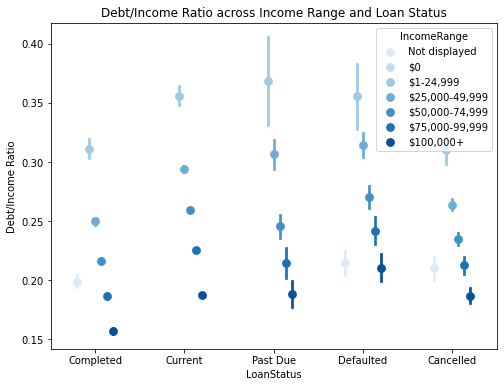

In [50]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'LoanStatus', y = 'DebtToIncomeRatio', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Debt/Income Ratio across Income Range and Loan Status')
plt.ylabel('Debt/Income Ratio')
plt.show();

In [ ]:
# Chart above doesn't reveal any pattern about the DtI.
# Plot grouped bar chart

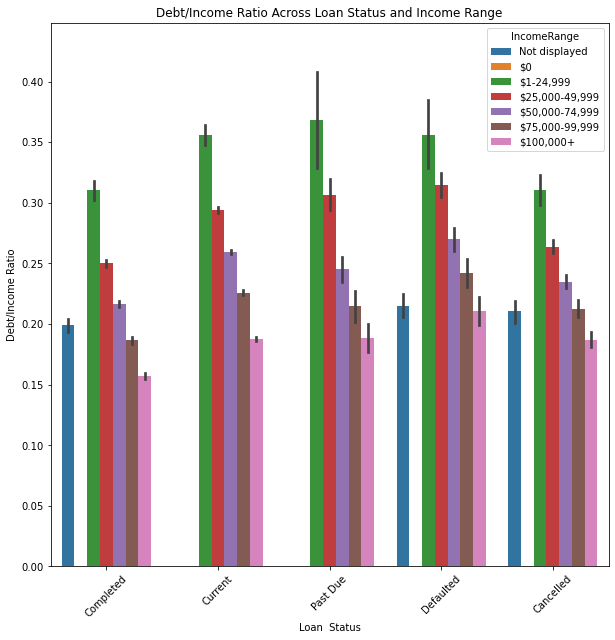

In [51]:
plt.figure(figsize=(10,10))

ax = sb.barplot(data = loan, x='LoanStatus', y='DebtToIncomeRatio', hue ='IncomeRange')
plt.legend(ncol=1, loc='upper right', title='IncomeRange')
plt.xticks(rotation=45)

ax.set_title('Debt/Income Ratio Across Loan Status and Income Range')
ax.set_xlabel('Loan  Status')
ax.set_ylabel('Debt/Income Ratio')
ax.margins(y=0.1)


> The distributions are more or less equal, giving no significant analysis. However, higher income brackets tend to have lower
DtI than the rest.

#### 3. What is the relationship between LoanStatus, BorrowerRate and EmploymentStatus?

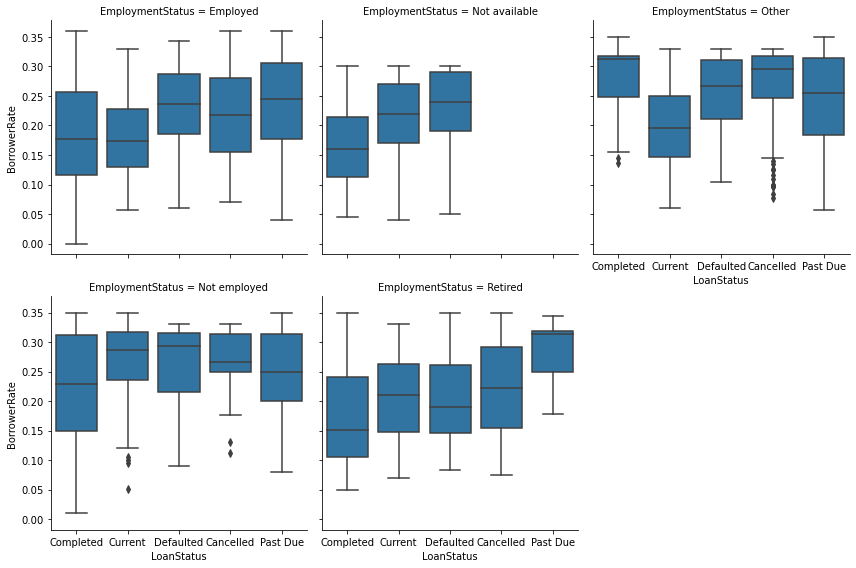

In [52]:
g = sb.FacetGrid(data = loan, col = 'EmploymentStatus', height = 4, col_wrap=3)
g.map(sb.boxplot, 'LoanStatus', 'BorrowerRate', order = None)

> There isn't much difference between plots but employed and retired tend to have lower median borrower rates.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a positive relationship between DtI and BorrowerRate, because higher DtI increases loan risk and thus raises interest rates, making it easier for borrowers to default.

### Were there any interesting or surprising interactions between features?

> The relationship between DebtToIncomeRatio and LoanStatus isn't as strong as anticipated but there is a clear relationship between IncomeRange and DebtToIncomeRatio.

## Conclusions
Univariate exploration:

1. Completed loans and Current loans constitute the largest shares of LoanStatus.
2. Most borrowers are employed and are in the mid-range (\\$25,000-49,999) to upper-range (\\$100,000+) income brackets.
3. 92% of borrowers also have a verifiable source of income.
4. Most people also have 0 to 1 recommendations.
5. Other and Professional constitute the largest share of occupations but they are vague, given how detailed the other occupations are. Occupation will thus not be useful for analysis, and also because it has too many categories.
6. The BorrowerRate is generally right-skewed and multimodal. 
7. After cleaning, the DebtToIncomeRatio distribution was skewed to the right, with a general smooth slope and some unusual gaps. DtI is concentrated around 0.2, which is an acceptable ratio because the lower the DtI the better. DtIs higher than 0.5 are considered unsafe by lenders and they appear as outliers in the boxplot distribution.

Bivariate Exploration:

1. DebtToIncomeRatio has a positive correlation with BorrowerRate because a high DtI lowers creditworthiness and leads to higher borrower rates due to lenders seeing the listing as risky.
2. Completed Loan listings have a generally lower median BorrowerRate, indicating that lower interest rates increase likelihood of loan clearance. 
3. The Recommendation distributions for LoanStatus are all thin slices at similar levels as the values are concentrated around 0 to 1. However, it's interesting to note that high outliers, including max values, are concentrated at Completed, showing that listings with more recommendations are more likely to have the loans cleared.
4. Most borrowers with Completed or Current loan status have an income of at least $25,000.
5. Borrowers with a Completed or Current loan status typically have a verifiable income source.

Multivariate Exploration:

1. There is a positive relationship between DtI and BorrowerRate, and Current and Completed LoanStatus have high concentrations of values around the lower regions of both numeric variables, while Cancelled, Defaulted and Past Due have very low concentrations in the the lower regions of both numeric variables. Thus, borrowers with healthy (lower) DtI and lower borrower rates are more likely to clear their loans.
2. There is not much of a significant relationship between LoanStatus, IncomeRange and BorrowerRate. However, higher income brackets tend to have lower DtI than the rest.
3. There also is not much difference between box plots for relationship between LoanStatus, BorrowerRate and EmploymentStatus, but employed and retired tend to have lower median rates.